In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
! ls

AtltoDalAGG.txt   DaltoDenv.txt      LAtoDenv.txt     SeatoDenvAGG.txt
AtltoDal.txt	  DenvtoMinnAGG.txt  MiatoAtlAGG.txt  SeatoDenv.txt
ChitoAtlAGG.txt   DenvtoMinn.txt     MiatoAtl.txt
ChitoAtl.txt	  files.ipynb	     NYtoAtlAGG.txt
DaltoDenvAGG.txt  LAtoDenvAGG.txt    NYtoAtl.txt


In [3]:
def get_flow(traffic):
    index = traffic.find('Bit')
    flow = traffic[2:index]
    
    if flow.endswith('M'):
        f = float(flow[:-2]) * 1e6
    elif flow.endswith('k'):
        f = float(flow[:-2]) * 1e3
    else:
        f = float(flow)
    return f

In [4]:
def save_flows(content):
    flows = []
    j = 0

    for i in content.split('[2d')[1:]:
        j += 1

        incoming = i.split('urr')[1]
        outgoing = i.split('urr')[2]

        in_flow = get_flow(incoming)
        out_flow = get_flow(outgoing)

        flows.append(in_flow + out_flow)

    # plt.plot(np.arange(len(flows[:1200])), np.array(flows[:1200]))
    # # plt.show()
    
    return np.array(flows[:1200])

In [5]:
files = ['AtltoDal.txt',  'DaltoDenv.txt',   'MiatoAtl.txt',  'SeatoDenv.txt',
'ChitoAtl.txt',  'DenvtoMinn.txt',  'LAtoDenv.txt',  'NYtoAtl.txt']

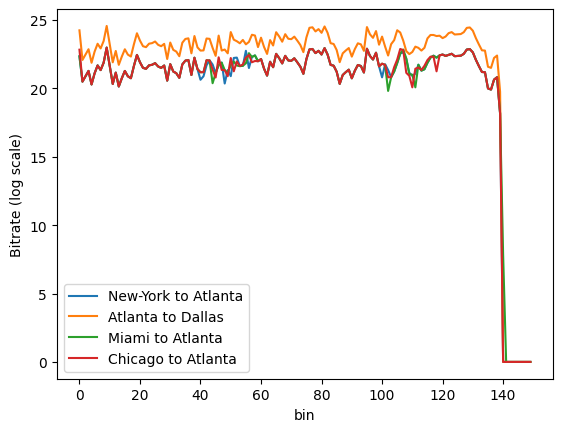

In [6]:
c_files = [files[i] for i in [-1, 1, 2, 4]]
link_flows = []
for file in c_files:
    with open(file, 'r') as f:
        content = f.read()
        flow = save_flows(content)
        link_flows.append([flow, file])
        # print(len(np.split(flow, flow.shape[0] // 5)))
        agg = np.split(flow, flow.shape[0] // 8)
        new = np.array([a.mean() for a in agg])
        plt.plot(np.arange(len(new)), np.log2(new + 1))
        # print(np.log2(new + 1))
        # with open(file[:-4] + 'AGG.txt, 'w') as f:
        #     f.write(
        pd.DataFrame(new).to_csv(file[:-4] + 'AGG.txt')
plt.legend(['New-York to Atlanta', 'Atlanta to Dallas', 'Miami to Atlanta', 'Chicago to Atlanta'])
plt.xlabel('bin')
plt.ylabel('Bitrate (log scale)')
plt.show()

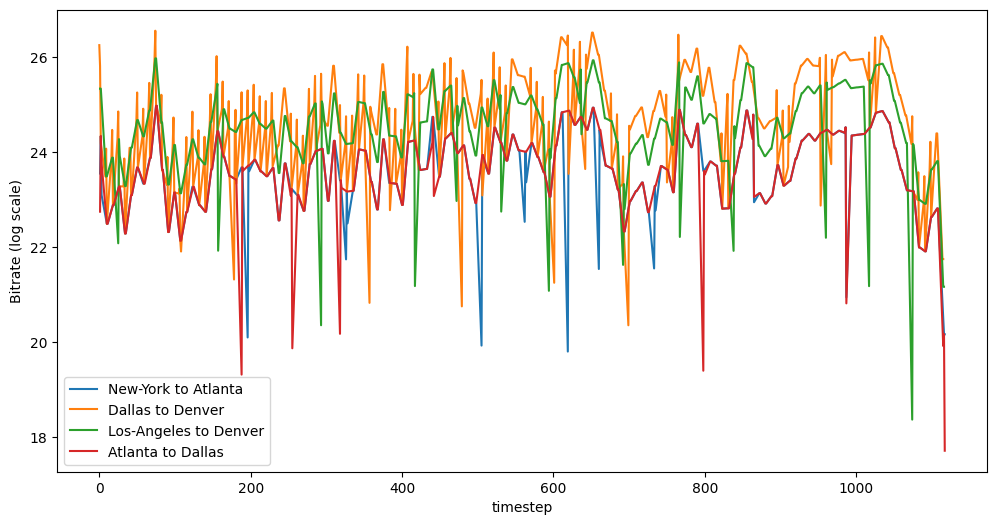

In [15]:
c_files = [files[i] for i in [-1, 1, -2, 0]]
link_flows = []
plt.figure(figsize=(12,6))
for file in c_files:
    with open(file, 'r') as f:
        content = f.read()
        flow = save_flows(content)
        link_flows.append([flow, file])
        # print(len(np.split(flow, flow.shape[0] // 5)))
        agg = np.split(flow, flow.shape[0] // 1)
        new = np.array([a.mean() for a in agg])
        # plt.plot(np.arange(len(new)), np.log2(new + 1))
        # plt.plot(np.arange(len(flow)), np.log2(flow + 1))
        
        non_zero = np.log2(flow+1) > 15
        plt.plot(np.nonzero(non_zero)[0], np.log2(flow[non_zero] + 1))
        
        # print(np.log2(new + 1))
        # with open(file[:-4] + 'AGG.txt, 'w') as f:
        #     f.write(
        pd.DataFrame(new).to_csv(file[:-4] + 'AGG.txt')
plt.legend(['New-York to Atlanta', 'Dallas to Denver', 'Los-Angeles to Denver', 'Atlanta to Dallas'])
plt.xlabel('timestep')
plt.ylabel('Bitrate (log scale)')

plt.show()